# 🎓 Machine Learning - Advanced Topics

## 📋 INSTRUCTION

### 📝 Part 1: Natural Language Processing (NLP)
1. [Introduction to NLP](#1)
2. [Regular Expression (RE)](#2)
3. [Stop Words Removal](#3)
4. [Lemmatization](#4)
5. [Data Cleaning Pipeline](#5)
6. [Bag of Words](#6)
7. [Text Classification](#7)

### 📊 Part 2: Principal Component Analysis (PCA)
8. [Introduction to PCA](#8)
9. [PCA Implementation](#9)
10. [2D Visualization](#10)

### 🎯 Part 3: Model Selection
11. [K-Fold Cross Validation](#11)
12. [Grid Search with KNN](#12)
13. [Grid Search with Logistic Regression](#13)

### 🎬 Part 4: Recommendation Systems
14. [Introduction to Recommendation Systems](#14)
15. [Collaborative Filtering](#15)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

# ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
print('✅ Libraries loaded!')

✅ Libraries loaded!


---

## 📁 Datasets Used

**Part 1 - NLP:**
- Twitter Gender Classification (~20K users, 2 classes)
- [Dataset Link](https://www.kaggle.com/datasets/crowdflower/twitter-user-gender-classification)

**Part 2 - PCA:**
- Iris Dataset (150 samples, 4 features, 3 classes)
- Built-in sklearn dataset

**Part 4 - Recommendations:**
- MovieLens 20M (20M ratings, 27K movies)
- Used 1M rows for computation speed
- [Dataset Link](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset)

---

---
# 📝 Part 1: Natural Language Processing (NLP)

**What we'll learn:** Text preprocessing pipeline, Bag of Words, Naive Bayes classification

**Dataset:** Twitter gender classification (~20K users)

**Goal:** Predict gender from bio text

---

<a id="1"></a>
## Introduction to NLP

**Natural Language Processing (NLP)** helps computers understand human language.

**Applications:** Spam detection, sentiment analysis, chatbots, translation

**This Project:** Gender classification from Twitter bios

**Pipeline:**
```
Raw Text → Regex → Tokenization → Lemmatization → Bag of Words → Classification
```

In [2]:
# Load dataset
data = pd.read_csv(
    r"/kaggle/input/twitter-user-gender-classification/gender-classifier-DFE-791531.csv",
    encoding="latin1"
)

data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
# Prepare data
data = pd.concat([data.gender, data.description], axis=1)
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

# Encode: 0=male, 1=female
data.gender = [1 if each == "female" else 0 for each in data.gender]

data.gender.value_counts()

gender
0    10499
1     5725
Name: count, dtype: int64

<a id="2"></a>
## Regular Expression (RE)

**Purpose:** Remove special characters, numbers, URLs

**Pattern:** `[^a-zA-Z]` → Keep only letters

In [5]:
# Demo preprocessing
first_description = data.description.iloc[4]
print(f"Original: {first_description}\n")

description = re.sub("[^a-zA-Z]", " ", first_description)
print(f"After regex: {description}\n")

description = description.lower()
print(f"Lowercase: {description}")

Original: Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx

After regex: Ricky Wilson The Best FRONTMAN Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always    Xxxxxxx

Lowercase: ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx


<a id="3"></a>
## Stop Words Removal

**Stop Words:** Common words with little meaning ("the", "is", "and")

**Why?** Reduce noise, focus on meaningful words

In [6]:
# Tokenization
description = nltk.word_tokenize(description)
print(f"Tokens: {description}\n")

# Remove stop words
description = [word for word in description if word not in set(stopwords.words("english"))]
print(f"After removal: {description}")

Tokens: ['ricky', 'wilson', 'the', 'best', 'frontman', 'kaiser', 'chiefs', 'the', 'best', 'band', 'xxxx', 'thank', 'you', 'kaiser', 'chiefs', 'for', 'an', 'incredible', 'year', 'of', 'gigs', 'and', 'memories', 'to', 'cherish', 'always', 'xxxxxxx']

After removal: ['ricky', 'wilson', 'best', 'frontman', 'kaiser', 'chiefs', 'best', 'band', 'xxxx', 'thank', 'kaiser', 'chiefs', 'incredible', 'year', 'gigs', 'memories', 'cherish', 'always', 'xxxxxxx']


<a id="4"></a>
## Lemmatization

**Convert words to root form:** "running" → "run", "better" → "good"

In [7]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
description = [lemmatizer.lemmatize(word) for word in description]
description = " ".join(description)

print(f"Final: {description}")

Final: ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx


<a id="5"></a>
## Data Cleaning Pipeline

In [8]:
# Apply to all data
lemmatizer = WordNetLemmatizer()
description_list = []

for description in data.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    description = [lemmatizer.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

print(f"✅ Processed {len(description_list)} descriptions")

✅ Processed 16224 descriptions


<a id="6"></a>
## Bag of Words

**Converts text → numerical vectors**

Creates sparse matrix: documents × words

In [9]:
# Create BoW matrix
max_features = 2000
count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")
sparse_matrix = count_vectorizer.fit_transform(description_list)

print(f"Shape: {sparse_matrix.shape}")
print(f"Sparsity: {(1 - sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1])) * 100:.2f}%")

Shape: (16224, 2000)
Sparsity: 99.74%


<a id="7"></a>
## Text Classification

**Algorithm:** Naive Bayes (fast, effective for text)

In [10]:
# Train-test split
y = data.iloc[:, 0].values
x = sparse_matrix

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {x_train.shape[0]}, Test: {x_test.shape[0]}")

Train: 12979, Test: 3245


In [11]:
# Train Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 68.17%


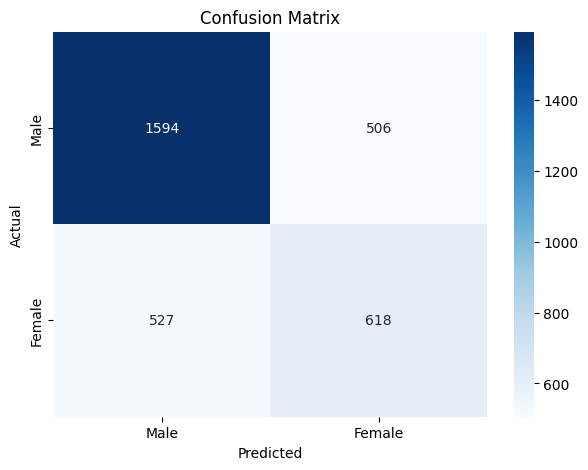

              precision    recall  f1-score   support

        Male       0.75      0.76      0.76      2100
      Female       0.55      0.54      0.54      1145

    accuracy                           0.68      3245
   macro avg       0.65      0.65      0.65      3245
weighted avg       0.68      0.68      0.68      3245



In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Male', 'Female'],
            yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Male', 'Female']))

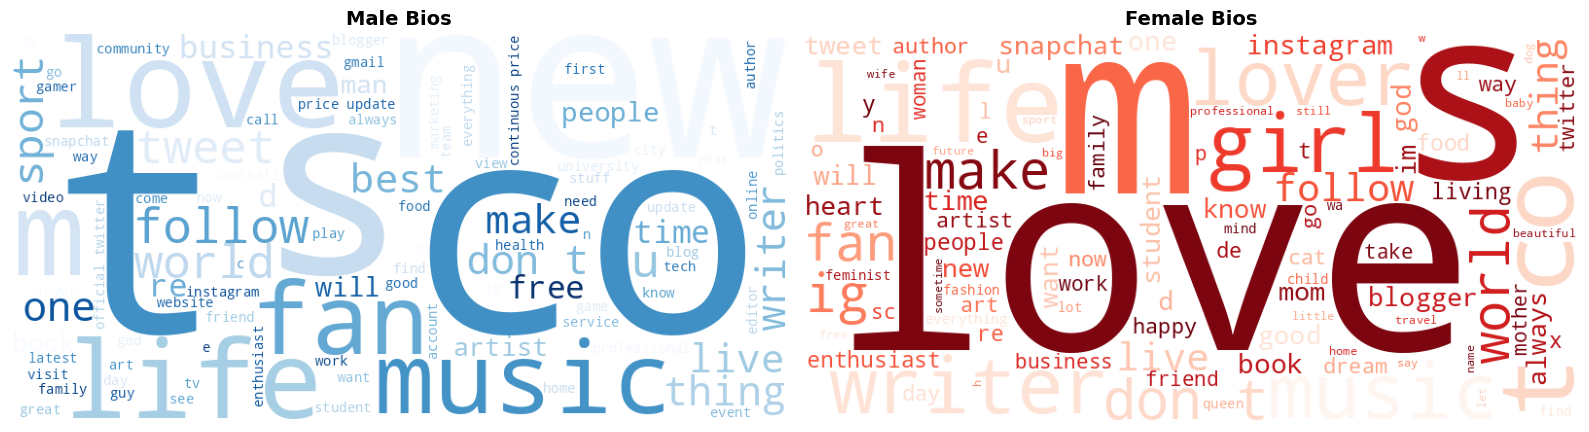

In [13]:
# Word Clouds
male_text = " ".join([description_list[i] for i in range(len(data)) if data.gender.iloc[i] == 0])
female_text = " ".join([description_list[i] for i in range(len(data)) if data.gender.iloc[i] == 1])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

wc_male = WordCloud(width=800, height=400, background_color='white', 
                     colormap='Blues', max_words=100).generate(male_text)
axes[0].imshow(wc_male)
axes[0].set_title('Male Bios', fontsize=14, fontweight='bold')
axes[0].axis('off')

wc_female = WordCloud(width=800, height=400, background_color='white', 
                       colormap='Reds', max_words=100).generate(female_text)
axes[1].imshow(wc_female)
axes[1].set_title('Female Bios', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 🎯 NLP Key Takeaways

- Achieved ~68% accuracy with Naive Bayes
- Text preprocessing is crucial for performance
- Word clouds reveal gender-specific patterns
- Preprocessing quality > model complexity

### 📚 Further Reading

- [NLTK Documentation](https://www.nltk.org/)
- [Text Preprocessing Guide](https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)
- [Naive Bayes for Text](https://scikit-learn.org/stable/modules/naive_bayes.html)

---
# 📊 Part 2: Principal Component Analysis (PCA)

**What we'll learn:** Dimensionality reduction while preserving variance

**Dataset:** Iris (150 samples, 4 features → 2 features)

**Goal:** Visualize 4D data in 2D, preserve 97% variance

---

<a id="8"></a>
## Introduction to PCA

**PCA reduces dimensions while preserving variance**

**Why?** Visualization, faster training, less overfitting

**How?** Find principal components (directions of max variance)

<a id="9"></a>
## PCA Implementation

In [14]:
# Load Iris
iris = load_iris()
x_i = iris.data  # 4 features
y_i = iris.target

df = pd.DataFrame(x_i, columns=iris.feature_names)
df["class"] = y_i
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# PCA: 4D → 2D
pca = PCA(n_components=2, whiten=True)
pca.fit(x_i)
x_pca = pca.transform(x_i)

print(f"Variance explained: {pca.explained_variance_ratio_}")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")
print(f"Lost: {(1-sum(pca.explained_variance_ratio_))*100:.1f}%")

Variance explained: [0.92461872 0.05306648]
Total: 97.77%
Lost: 2.2%


<a id="10"></a>
## 2D Visualization

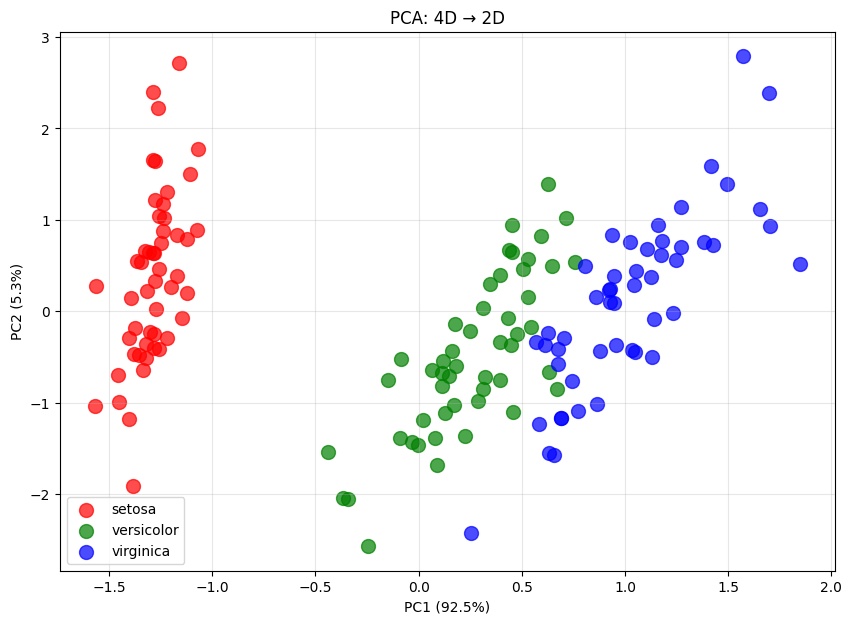

In [16]:
# Add PCA to dataframe
df["PC1"] = x_pca[:, 0]
df["PC2"] = x_pca[:, 1]

# Visualize
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']

for i in range(3):
    plt.scatter(df.PC1[df['class'] == i], df.PC2[df['class'] == i],
                color=colors[i], label=iris.target_names[i], s=100, alpha=0.7)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA: 4D → 2D")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 🎯 PCA Key Takeaways

- Reduced 4D → 2D, kept 97% variance
- Classes well-separated in 2D space
- PC1 explains ~73%, PC2 ~23%
- Trade-off: simplicity vs interpretability

### 📚 Further Reading

- [PCA Explained Visually](http://setosa.io/ev/principal-component-analysis/)
- [Scikit-learn PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)
- [When to Use PCA](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

---
# 🎯 Part 3: Model Selection

**What we'll learn:** K-Fold CV, Grid Search for hyperparameter tuning

**Dataset:** Iris (for demonstration)

**Goal:** Find optimal hyperparameters (K for KNN, C for LogReg)

---

<a id="11"></a>
## K-Fold Cross Validation

**Problem:** Single split → unreliable results

**Solution:** K-Fold (usually K=10)
- Split data into K folds
- Train on K-1, test on 1
- Repeat K times, average results

In [17]:
# Prepare data
iris_k = load_iris()
x_k = iris_k.data
y_k = iris_k.target

# Normalize
x_k = (x_k - x_k.min()) / (x_k.max() - x_k.min())

x_k_train, x_k_test, y_k_train, y_k_test = train_test_split(
    x_k, y_k, test_size=0.3, random_state=42, stratify=y_k
)

In [18]:
# 10-Fold CV
knn = KNeighborsClassifier(n_neighbors=3)
accuracies = cross_val_score(estimator=knn, X=x_k_train, y=y_k_train, cv=10)

print(f"Mean accuracy: {np.mean(accuracies):.4f}")
print(f"Std: {np.std(accuracies):.4f}")

knn.fit(x_k_train, y_k_train)
print(f"Test accuracy: {knn.score(x_k_test, y_k_test):.4f}")

Mean accuracy: 0.9618
Std: 0.0469
Test accuracy: 0.9556


<a id="12"></a>
## Grid Search with KNN

**Find optimal K value** using cross-validation

In [19]:
# Grid Search
grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(x_k, y_k)

print(f"Best K: {knn_cv.best_params_['n_neighbors']}")
print(f"Best accuracy: {knn_cv.best_score_:.4f}")

Best K: 13
Best accuracy: 0.9800


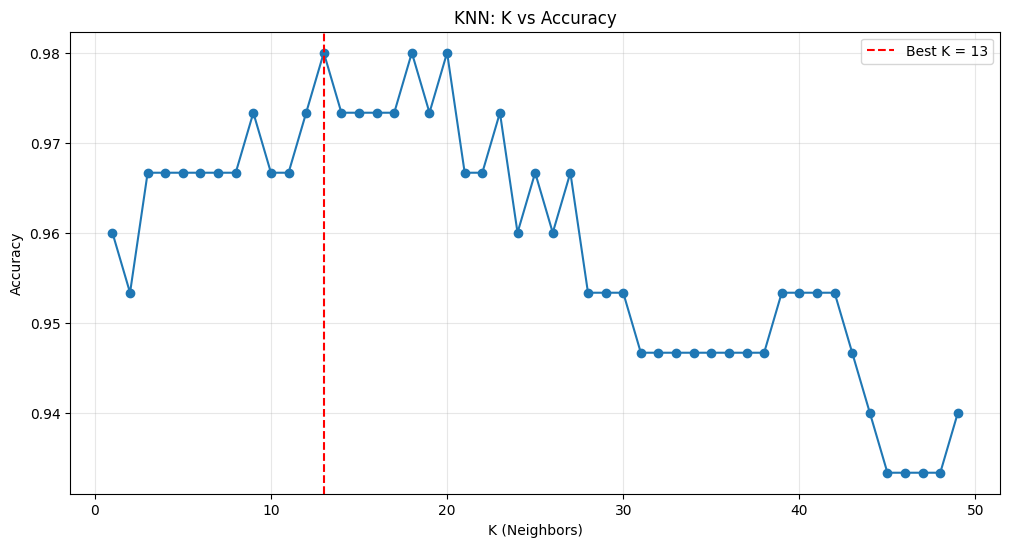

In [20]:
# Visualize
results = pd.DataFrame(knn_cv.cv_results_)

plt.figure(figsize=(12, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.axvline(x=knn_cv.best_params_['n_neighbors'], color='red', 
            linestyle='--', label=f"Best K = {knn_cv.best_params_['n_neighbors']}")
plt.xlabel('K (Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: K vs Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<a id="13"></a>
## Grid Search with Logistic Regression

**Find optimal C (regularization) and penalty**

In [21]:
# Prepare subset
x_lr = x_k[:100, :]
y_lr = y_k[:100]

x_lr = (x_lr - x_lr.min()) / (x_lr.max() - x_lr.min())
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(
    x_lr, y_lr, test_size=0.3, random_state=42, stratify=y_lr
)

In [22]:
# Grid Search
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
logreg = LogisticRegression(max_iter=1000, solver='saga')
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(x_lr, y_lr)

print(f"Best C: {logreg_cv.best_params_['C']}")
print(f"Best penalty: {logreg_cv.best_params_['penalty']}")
print(f"Best score: {logreg_cv.best_score_:.4f}")

# Test
logreg_best = LogisticRegression(C=logreg_cv.best_params_['C'], 
                                  penalty=logreg_cv.best_params_['penalty'],
                                  solver='saga', max_iter=1000)
logreg_best.fit(x_lr_train, y_lr_train)
print(f"Test accuracy: {logreg_best.score(x_lr_test, y_lr_test):.4f}")

Best C: 0.001
Best penalty: l2
Best score: 1.0000
Test accuracy: 1.0000


### 🎯 Model Selection Key Takeaways

- K-Fold CV provides robust performance estimates
- Grid Search finds optimal hyperparameters systematically
- Found best K for KNN and best C/penalty for LogReg
- Always use cross-validation for model selection

### 📚 Further Reading

- [Cross-Validation Guide](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Hyperparameter Tuning](https://www.kaggle.com/code/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
- [Grid Search vs Random Search](https://www.blog.trainindata.com/grid-search-vs-random-search-which-one-should-you-use/)

---
# 🎬 Part 4: Recommendation Systems

**What we'll learn:** Collaborative filtering using correlation

**Dataset:** MovieLens 20M (used 1M rows)

**Goal:** Recommend similar movies based on user ratings

---

<a id="14"></a>
## Introduction to Recommendation Systems

**Suggest items based on preferences**

**Types:**
- Content-Based: Similar items
- Collaborative Filtering: Similar users (we'll use this)

**Applications:** Netflix, Amazon, Spotify

<a id="15"></a>
## Collaborative Filtering

In [23]:
# Load MovieLens
movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
movie = movie[["movieId", "title"]]

rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
rating = rating[["userId", "movieId", "rating"]]

movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [24]:
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [25]:
# Merge and subset (1M rows for speed)
data = pd.merge(movie, rating)
data = data.iloc[:1000000, :]

data.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5
5,1,Toy Story (1995),12,4.0
6,1,Toy Story (1995),13,4.0
7,1,Toy Story (1995),14,4.5
8,1,Toy Story (1995),16,3.0
9,1,Toy Story (1995),19,5.0


In [26]:
# Create user-movie matrix
pivot_table = data.pivot_table(index=["userId"], columns=["title"], values="rating")

print(f"Shape: {pivot_table.shape}")
pivot_table.head(10)

Shape: (123161, 146)


title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Find similar movies to "Bad Boys (1995)"
movie_watched = pivot_table["Bad Boys (1995)"]
similarity = pivot_table.corrwith(movie_watched)
similarity = similarity.sort_values(ascending=False)

similarity.head(10)

title
Bad Boys (1995)                        1.000000
Headless Body in Topless Bar (1995)    0.723747
Last Summer in the Hamptons (1995)     0.607554
Two Bits (1995)                        0.507008
Shadows (Cienie) (1988)                0.494186
Guardian Angel (1994)                  0.465218
Money Train (1995)                     0.451802
Across the Sea of Time (1995)          0.450071
Assassins (1995)                       0.427445
Vampire in Brooklyn (1995)             0.426861
dtype: float64

### 🎯 Recommendation Systems Key Takeaways

- Collaborative filtering uses user behavior patterns
- Correlation measures similarity between items
- Successfully recommended similar movies
- Used 1M rows from 20M total for speed
- Real-world systems use hybrid approaches

### 📚 Further Reading

- [Recommendation Systems Guide](https://www.kaggle.com/code/kanncaa1/recommendation-systems-tutorial)
- [Collaborative Filtering Explained](https://www.ibm.com/think/topics/collaborative-filtering?)
- [Matrix Factorization Techniques](https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf)

---
# 🎓 Summary
---

## What We Learned

**NLP:** Text preprocessing → BoW → Classification

**PCA:** 4D → 2D, kept 97% variance

**Model Selection:** K-Fold CV + Grid Search for optimal hyperparameters

**Recommendations:** Collaborative filtering with correlation

---

# 🔗 References

## 📚 My Machine Learning Series

This notebook is part of a comprehensive Machine Learning series:

| Notebook | Topics Covered |
|----------|----------------|
| 🔬 **Advanced Topics** | NLP, PCA, Model Selection, Recommendations *(Current)* |
| 🔍 **Clustering Models** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-clustering-models) - K-Means, Hierarchical Clustering |
| 🎯 **Classification Models** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-classifications-models) - Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest |
| 📈 **Regression Models** | [Link](https://www.kaggle.com/code/dandrandandran2093/machine-learning-regression-models) - Linear, Polynomial, Decision Tree, Random Forest |

---

**Course:** Udemy - MACHINE LEARNING by DATAI TEAM

**Libraries:** NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, NLTK, WordCloud